**1. Tujuan**\
Visualisasi ini bertujuan untuk memetakan, memahami dan meningkatkan pengetahuan tentang indeks kebahagiaan negara-negara (learn/increase knowledge), dan mengaksentuasi isu (emphasize issues). Dengan menyajikan tren kebahagiaan dari waktu ke waktu, visualisasi ini menimbulkan pertanyaan tentang faktor apa saja yang mempengaruhi tingkat kebahagiaan suatu negara dan urgensi melakukan diskusi terkait kesejahteraan secara global.

**2. User**



> A Completely Global


Visualisasi ini dibuat untuk orang di seluruh dunia yang tertarik untuk memahami bagaimana tingkat kebahagiaan di berbagai negara. Visualisasi ini informasinya bersifat umum dan mudah dipahami jadi dapat dikonsumsi masyarakat luas tanpa memandang latar belakang dan pengalaman pendidikannya.

**3. Fungsi**


> When the function is to explain.

Visualisasi yang dibuat lebih condong ke arah explanatory karena visualisasi tersebut menyampaikan narasi yang sudah spesifik tentang tingkat kebahagiaan di berbagai negara. Desain visual yang intuitif juga digunakan untuk menyampaikan pesan dalam visualisasi ini, ex: penambahan highlight pada negara Finlandia.



**4. Tone**


> Pragmatic or Analytical Portrayal

Visualisaasi yang dibuat memiliki tone pragmatis karena berfokus menyampaikan informasi dan analisis yang terstruktur dan tepat pada tujuan (tidak abstrak), dan tidak bertujuan untuk memicu sisi emosional. Dengan adanya grafik tren juga cocok dengan salah contoh dari *pragmatic tone visualization*.

In [4]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import squarify

/content/.config/.last_opt_in_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/configurations/config_default
/content/.config/logs/2024.09.25/18.23.16.379542.log
/content/.config/logs/2024.09.25/18.23.58.041880.log
/content/.config/logs/2024.09.25/18.23.40.958965.log
/content/.config/logs/2024.09.25/18.23.56.396629.log
/content/.config/logs/2024.09.25/18.24.13.190037.log
/content/.config/logs/2024.09.25/18.24.13.969738.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


Upload Data

In [9]:
df = pd.read_csv('/content/world-happiness-report-2021.csv') # Data laporan tingkat kebahagiaan di berbagai negara tahun 2021
df2 = pd.read_csv('/content/world-happiness-report.csv') # Data tingkat kebahagiaan berbagai negara
pop = pd.read_csv('/content/population_by_country_2020.csv') # Data populasi berbagai negara
safety = df.copy()

In [10]:
# Ganti nama kolom agar mudah menyatukan nanti
df.rename(columns={'Negara': 'Country'}, inplace=True)
df2.rename(columns={'Negara': 'Country'}, inplace=True)
pop.rename(columns={'Negara (atau wilayah dependensi)': 'Country'}, inplace=True)

In [5]:
# Definisi variabel warna baru
low_c = '#e377c2'  # Merah Muda
high_c = '#9467bd'  # Ungu
plt.rcParams["font.family"] = "monospace"

Buat plot untuk visualisasi data

In [11]:
past_winners = df2.loc[df2.groupby("year")["Life Ladder"].idxmax()]
past_bottom = df2.loc[df2.groupby("year")["Life Ladder"].idxmin()]

hap = df.groupby('Country name')['Ladder score'].mean().sort_values(ascending=False)[:10]
unhap = df.groupby('Country name')['Ladder score'].mean().sort_values(ascending=True)[:10]
top_bottom = pd.concat([hap, unhap]).sort_values(ascending=True)

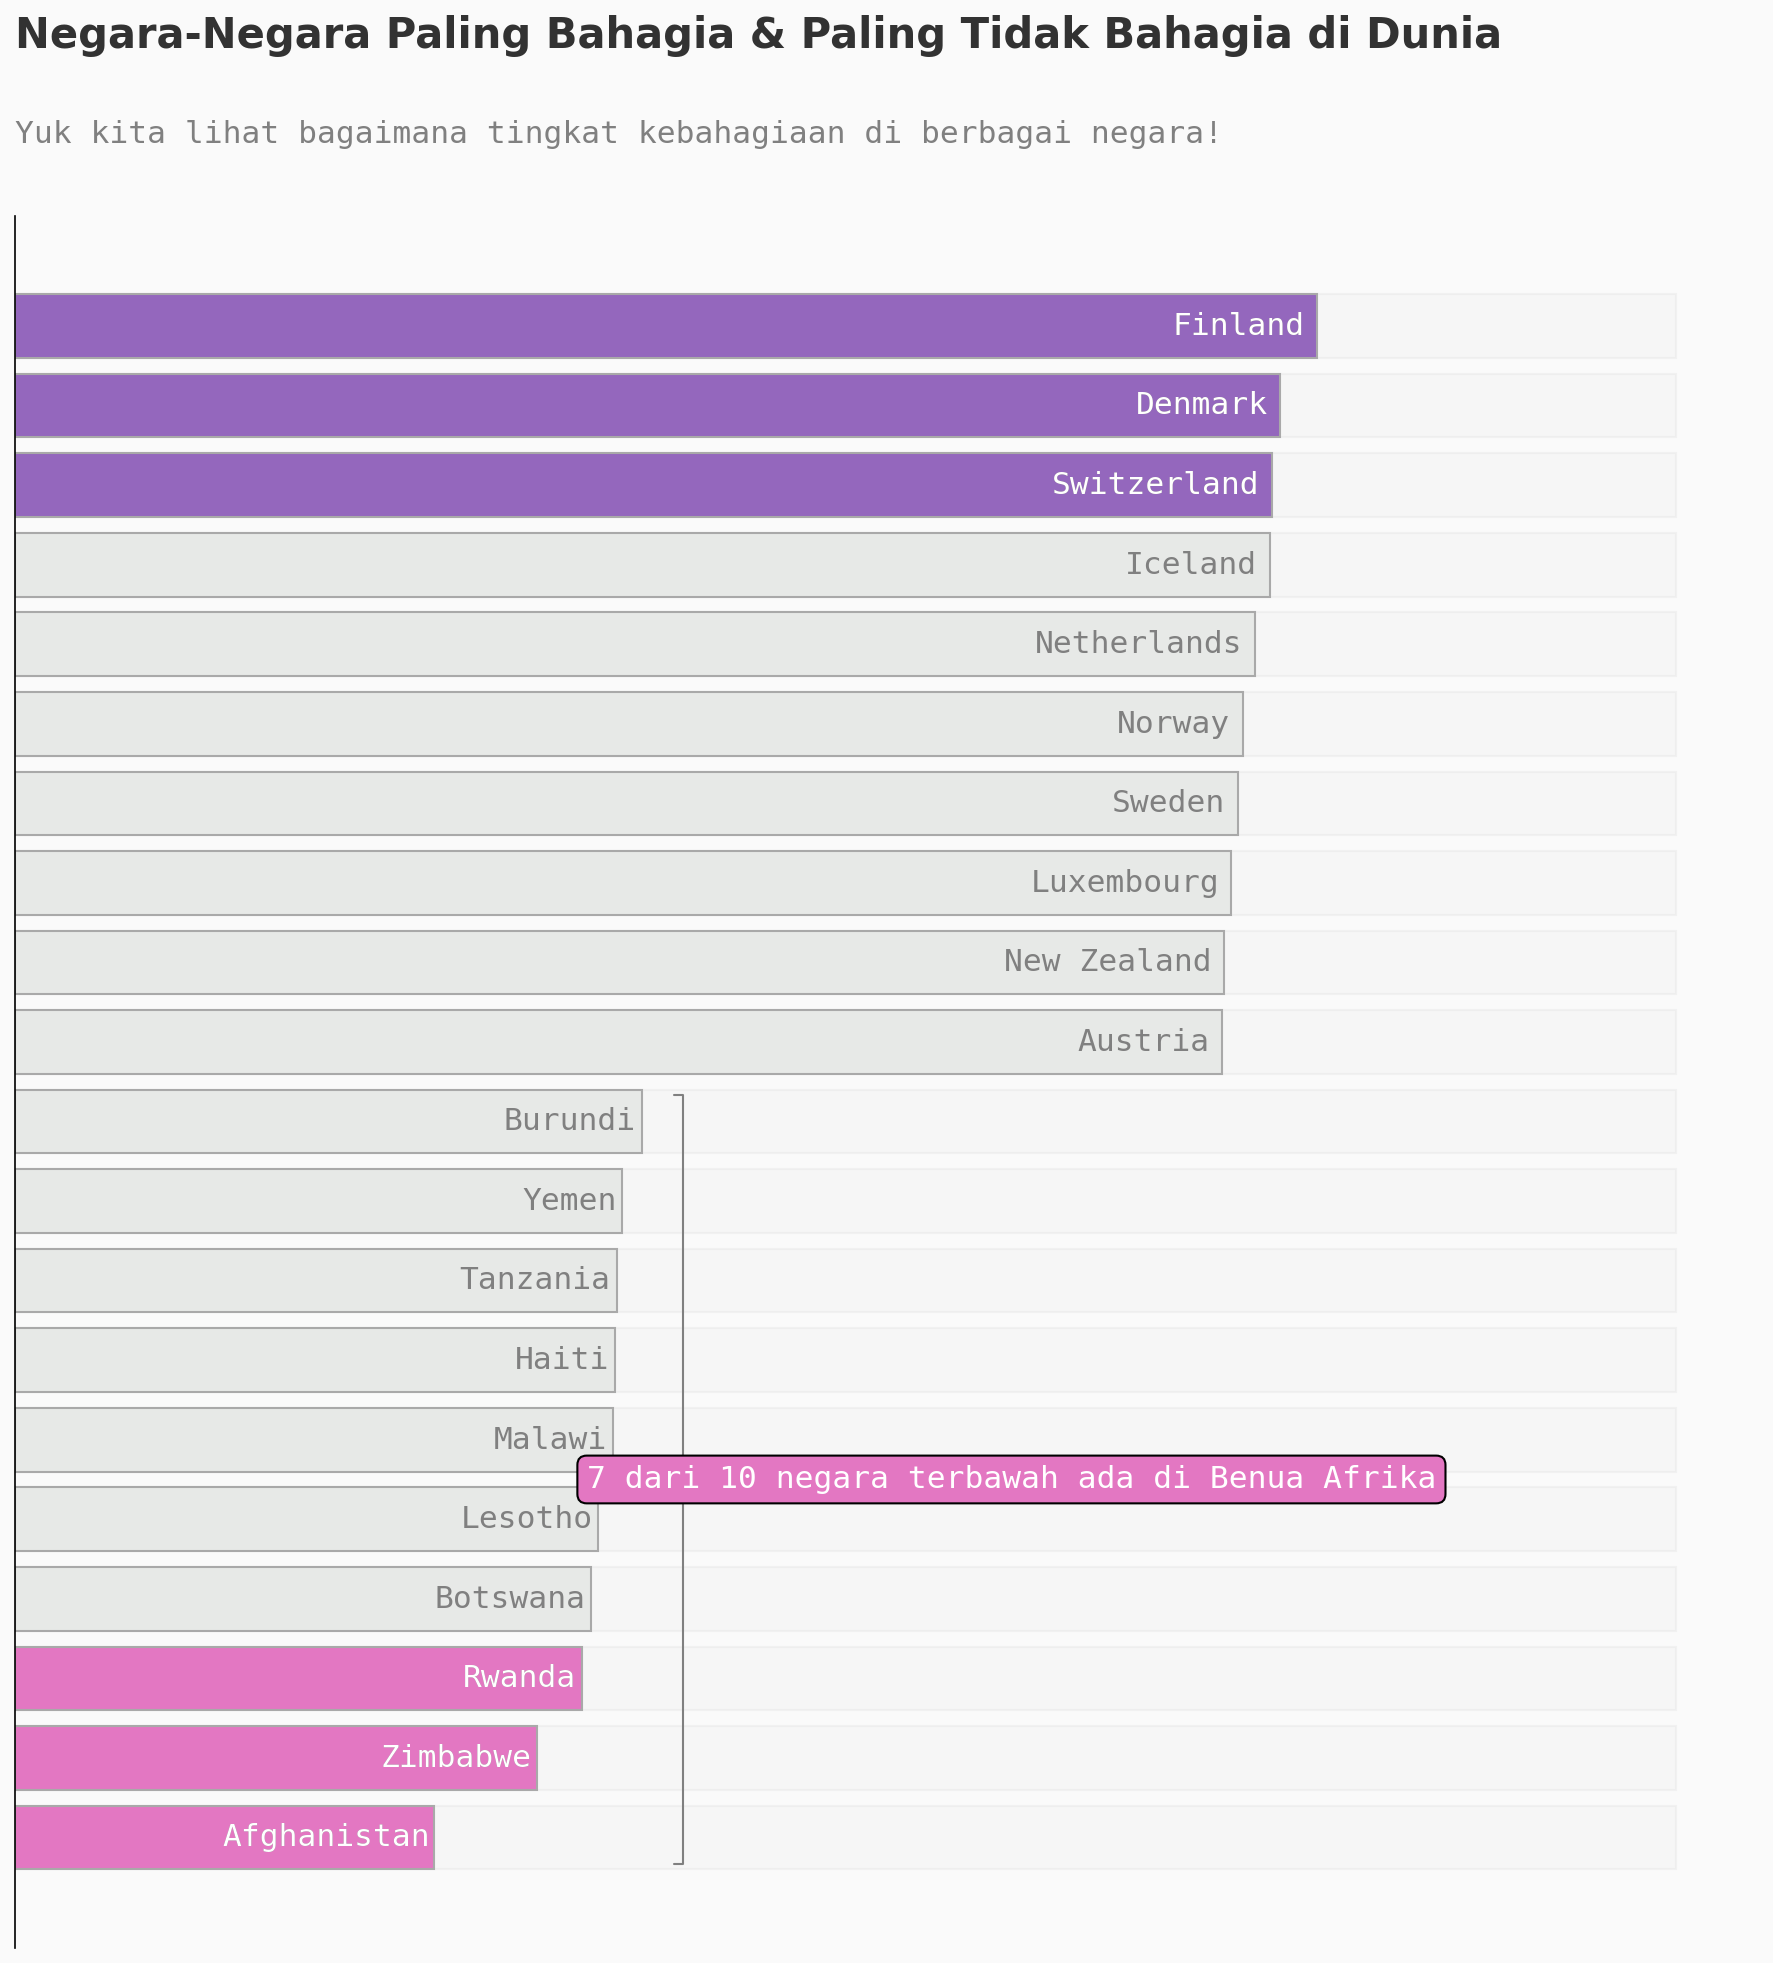

In [12]:
# Plot
fig = plt.figure(figsize=(15, 15), dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)

# Inisialisasi plot
data = top_bottom

color_map = ['#e7e9e7' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] = low_c  # Color highlight untuk teratas
color_map[17] = color_map[18] = color_map[19] = high_c  # Color highlight untuk terbawah

# Base
ax0.barh(data.index, 10, edgecolor='darkgray', color='lightgray', alpha=0.1)

# Aktual
ax0.barh(data.index, data, edgecolor='darkgray', color=color_map)

for i in range(0, 20):
    ax0.annotate(list(data.index)[i],
                 xy=(data[i] - (data[i] * 0.01), i),
                 va='center', ha='right', fontweight='light', fontfamily='monospace', fontsize=15, color='gray', rotation=0)

# Highlight negara teratas dan terbawah
for i in range(0, 3):
    ax0.annotate(list(data.index)[i],
                 xy=(data[i] - (data[i] * 0.01), i),
                 va='center', ha='right', fontweight='light', fontfamily='monospace', fontsize=15, color='white', rotation=0)

for i in range(17, 20):
    ax0.annotate(list(data.index)[i],
                 xy=(data[i] - (data[i] * 0.01), i),
                 va='center', ha='right', fontweight='light', fontfamily='monospace', fontsize=15, color='white', rotation=0)

ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])

# Menghilangkan sebagian spines
for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)

# Judul dan deskripsi
ax0.text(0, 22.5, 'Negara-Negara Paling Bahagia & Paling Tidak Bahagia di Dunia',
         fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
ax0.text(0, 21.3, 'Yuk kita lihat bagaimana tingkat kebahagiaan di berbagai negara!',
         fontfamily='monospace', fontsize=15, fontweight='light', color='gray')

# Anotasi tambahan
ax0.annotate('7 dari 10 negara terbawah ada di Benua Afrika', xy=(4, 4.5), xytext=(6, 4.5), xycoords='data',
             fontsize=15, ha='center', va='center', fontfamily='monospace',
             bbox=dict(boxstyle='round', fc=low_c),
             arrowprops=dict(arrowstyle='-[, widthB=12.3, lengthB=0.3', lw=1, color='gray'), color='white')

plt.show()

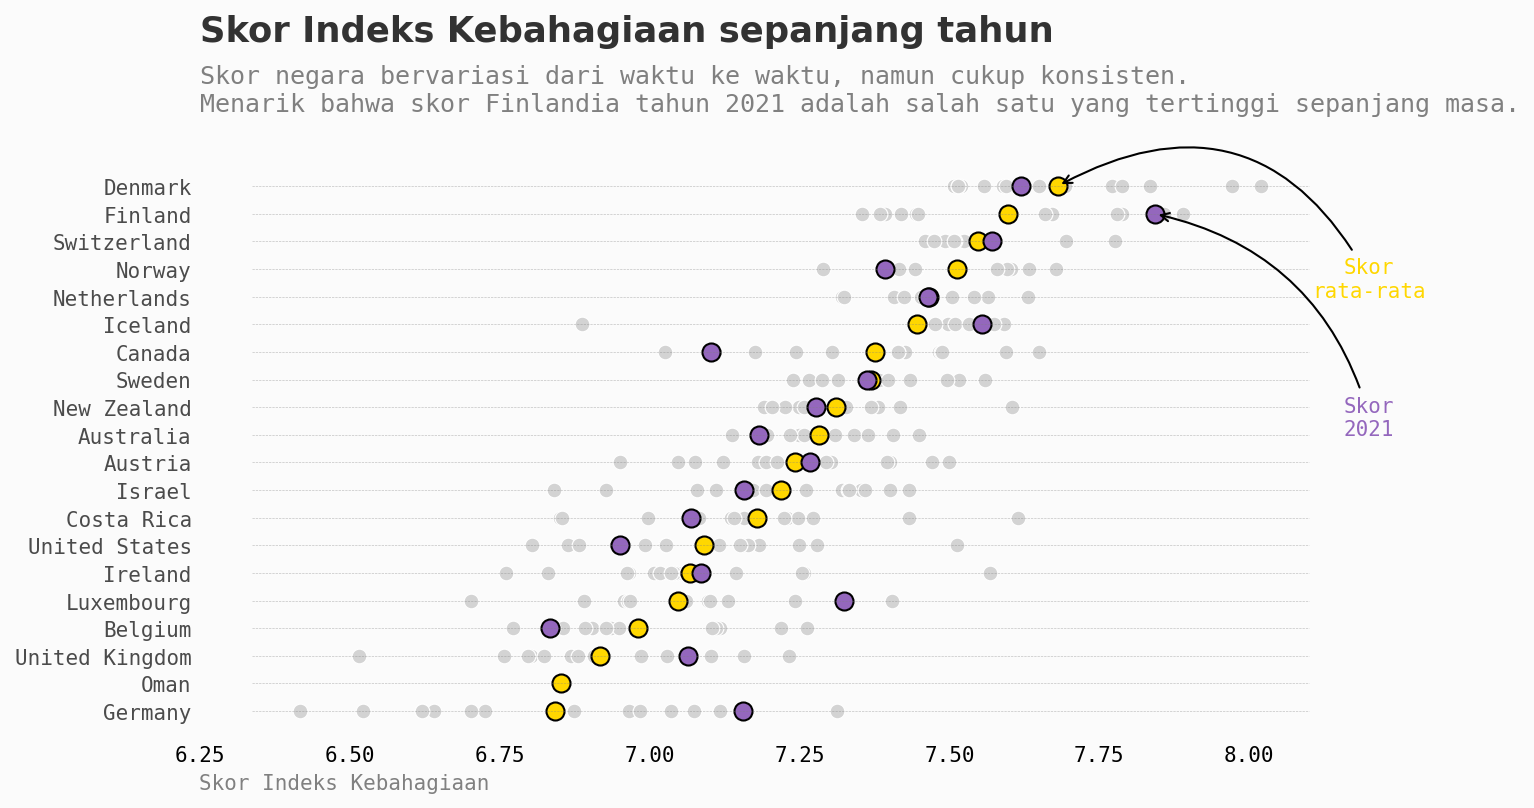

In [19]:
background = "#fbfbfb"
fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # warna backgrounf
ax.set_facecolor(background)

# List yang dikurangi karena terlalu banyak untuk ditampilkan sekaligus
top_list_ = df2.groupby('Country name')['Life Ladder'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='Life Ladder',ascending=True)

plot = 1
for country in top_list_['Country name']:
    mean = df2[df2['Country name'] == country].groupby('Country name')['Life Ladder'].mean()
    # nilai historis
    sns.scatterplot(data=df2[df2['Country name'] == country], y=plot, x='Life Ladder',color='lightgray',s=50,ax=ax)
    # nilai rata-rata
    sns.scatterplot(data=df2[df2['Country name'] == country], y=plot, x=mean,color='gold',ec='black',linewidth=1,s=75,ax=ax)
    # nilai 2021
    sns.scatterplot(data=df[df['Country name'] == country], y=plot, x='Ladder score',color=high_c,ec='black',linewidth=1,s=75,ax=ax)
    plot += 1

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['Country name'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Skor Indeks Kebahagiaan",fontfamily='monospace',loc='left',color='gray')

for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.hlines(y=top_list_.index+1, xmin=Xstart, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)
ax.text(6.25, Yend+4.3, 'Skor Indeks Kebahagiaan sepanjang tahun', fontsize=17, fontweight='bold', fontfamily='sansserif',color='#323232')
ax.text(6.25, Yend+0.75,
'''
Skor negara bervariasi dari waktu ke waktu, namun cukup konsisten.
Menarik bahwa skor Finlandia tahun 2021 adalah salah satu yang tertinggi sepanjang masa.
''', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')

plt.annotate('Skor\n2021', xy=(7.842, 19), xytext=(8.2, 11),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"), fontsize=10,fontfamily='monospace',ha='center', color=high_c)

plt.annotate('Skor\nrata-rata', xy=(7.6804, 20), xytext=(8.2, 16),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.5"), fontsize=10,fontfamily='monospace',ha='center', color='gold')

plt.show()

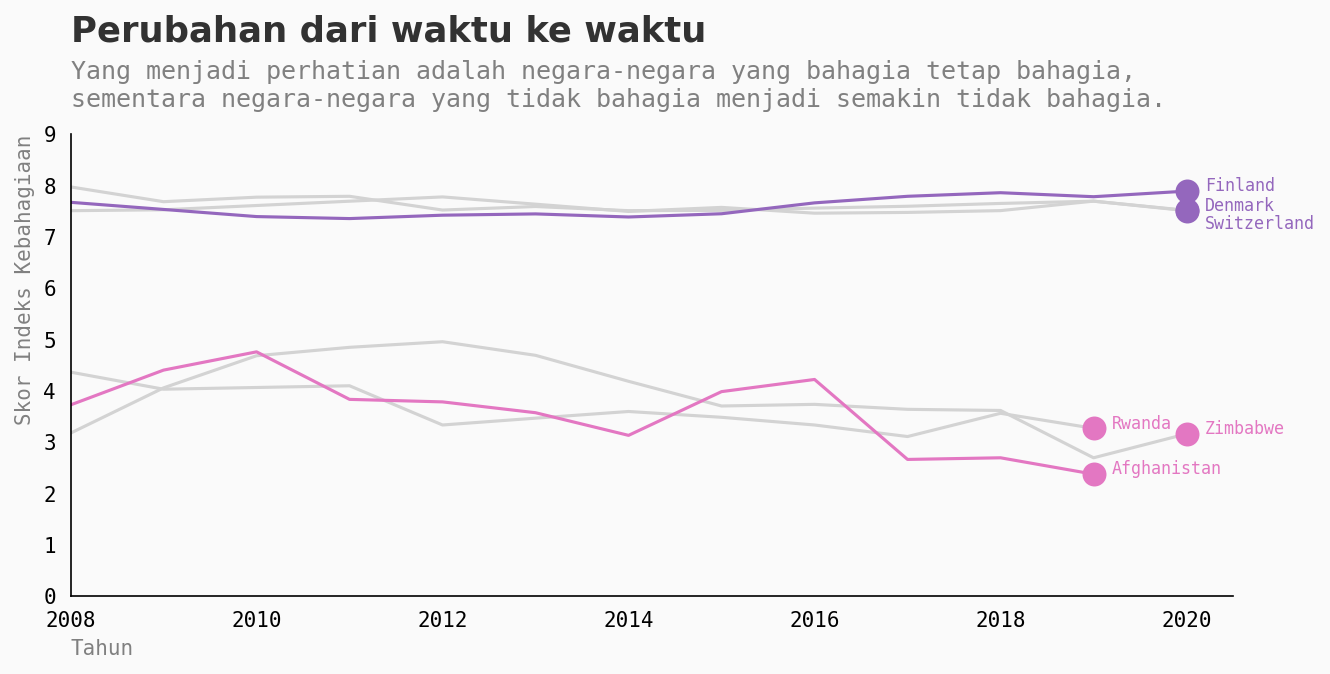

In [20]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(10, 4), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_xlabel("Tahun", fontfamily='monospace', loc='left', color='gray')
ax0.set_ylabel("Skor Indeks Kebahagiaan", fontfamily='monospace', loc='top', color='gray')
ax0.tick_params(axis='both', which='major', labelsize=10)

ax0.tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=True)

# low
sns.lineplot(ax=ax0, data=df2[(df2['Country name'] == 'Zimbabwe')], x='year', y='Life Ladder', color='lightgray')
sns.lineplot(ax=ax0, data=df2[(df2['Country name'] == 'Rwanda')], x='year', y='Life Ladder', color='lightgray')
sns.lineplot(ax=ax0, data=df2[(df2['Country name'] == 'Afghanistan')], x='year', y='Life Ladder', color=low_c)

# high
sns.lineplot(ax=ax0, data=df2[(df2['Country name'] == 'Denmark')], x='year', y='Life Ladder', color='lightgray')
sns.lineplot(ax=ax0, data=df2[(df2['Country name'] == 'Switzerland')], x='year', y='Life Ladder', color='lightgray')
sns.lineplot(ax=ax0, data=df2[(df2['Country name'] == 'Finland')], x='year', y='Life Ladder', color=high_c)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.plot(2019, df2[(df2['Country name'] == 'Afghanistan')]['Life Ladder'].reset_index().iloc[-1, -1], 'ko', markersize=10, fillstyle='full', color=low_c, markeredgewidth=1.5)
ax0.plot(2020, df2[(df2['Country name'] == 'Zimbabwe')]['Life Ladder'].reset_index().iloc[-1, -1], 'ko', markersize=10, fillstyle='full', color=low_c, markeredgewidth=1.5)
ax0.plot(2019, df2[(df2['Country name'] == 'Rwanda')]['Life Ladder'].reset_index().iloc[-1, -1], 'ko', markersize=10, fillstyle='full', color=low_c, markeredgewidth=1.5)

ax0.plot(2020, df2[(df2['Country name'] == 'Finland')]['Life Ladder'].reset_index().iloc[-1, -1], 'ko', markersize=10, fillstyle='full', color=high_c, markeredgewidth=1.5)
ax0.plot(2020, df2[(df2['Country name'] == 'Denmark')]['Life Ladder'].reset_index().iloc[-1, -1], 'ko', markersize=10, fillstyle='full', color=high_c, markeredgewidth=1.5)
ax0.plot(2020, df2[(df2['Country name'] == 'Switzerland')]['Life Ladder'].reset_index().iloc[-1, -1], 'ko', markersize=10, fillstyle='full', color=high_c, markeredgewidth=1.5)

ax0.text(2020.2, df2[(df2['Country name'] == 'Finland')]['Life Ladder'].reset_index().iloc[-1, -1], 'Finland', color=high_c, fontfamily='monospace', fontsize=8, rotation=0)
ax0.text(2020.2, df2[(df2['Country name'] == 'Denmark')]['Life Ladder'].reset_index().iloc[-1, -1], 'Denmark', color=high_c, fontfamily='monospace', fontsize=8, rotation=0)
ax0.text(2020.2, df2[(df2['Country name'] == 'Switzerland')]['Life Ladder'].reset_index().iloc[-1, -1]-0.35, 'Switzerland', color=high_c, fontfamily='monospace', fontsize=8, rotation=0)

ax0.text(2019.2, df2[(df2['Country name'] == 'Afghanistan')]['Life Ladder'].reset_index().iloc[-1, -1], 'Afghanistan', color=low_c, fontfamily='monospace', fontsize=8, rotation=0)
ax0.text(2020.2, df2[(df2['Country name'] == 'Zimbabwe')]['Life Ladder'].reset_index().iloc[-1, -1], 'Zimbabwe', color=low_c, fontfamily='monospace', fontsize=8, rotation=0)
ax0.text(2019.2, df2[(df2['Country name'] == 'Rwanda')]['Life Ladder'].reset_index().iloc[-1, -1], 'Rwanda', color=low_c, fontfamily='monospace', fontsize=8, rotation=0)

ax0.yaxis.set_ticks(np.arange(0, 10, 1))
ax0.set_xlim(left=2008, right=2020.5)
plt.xticks(fontname="monospace")
plt.yticks(fontname="monospace")

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend + (Yend * 0.2), 'Perubahan dari waktu ke waktu', fontsize=17, fontweight='bold', fontfamily='sansserif', color='#323232')
ax0.text(Xstart, Yend + (Yend * 0.06),
'''
Yang menjadi perhatian adalah negara-negara yang bahagia tetap bahagia,
sementara negara-negara yang tidak bahagia menjadi semakin tidak bahagia.''', fontsize=12, fontweight='light', fontfamily='monospace', color='gray')

plt.show()
